In [ ]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import torch.optim as optim
import matplotlib.pyplot as plt

In [ ]:
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=True, transform=transform, download=True
)

test_dataset = torchvision.datasets.MNIST(
    root="~/torch_datasets", train=False, transform=transform, download=True
)

train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True, num_workers=2, pin_memory=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=32, shuffle=False, num_workers=2
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/torch_datasets/MNIST/raw/train-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/torch_datasets/MNIST/raw/train-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/torch_datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/torch_datasets/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting /root/torch_datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/torch_datasets/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
itr = iter(train_loader)
images , labels = itr.next()
print(images[0],labels[0],images[0].shape)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [ ]:
class Autoencoder_Linear(nn.Module):
    def __init__(self,hidden_features):
        super().__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128), # (N, 784) -> (N, 128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, hidden_features) # -> N, 3
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(hidden_features, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Adam Optimizer

epoch : 1/5, loss = 3.930647
epoch : 2/5, loss = 3.174992
epoch : 3/5, loss = 2.977072
epoch : 4/5, loss = 2.844548
epoch : 5/5, loss = 2.763700
Test Reconstruction Loss=1.365608
epoch : 1/5, loss = 3.749912
epoch : 2/5, loss = 2.757578
epoch : 3/5, loss = 2.546494
epoch : 4/5, loss = 2.426934
epoch : 5/5, loss = 2.353098
Test Reconstruction Loss=1.160588
epoch : 1/5, loss = 3.886528
epoch : 2/5, loss = 3.046195
epoch : 3/5, loss = 2.462985
epoch : 4/5, loss = 2.261861
epoch : 5/5, loss = 2.169714
Test Reconstruction Loss=1.062279
epoch : 1/5, loss = 3.730848
epoch : 2/5, loss = 2.422756
epoch : 3/5, loss = 2.093173
epoch : 4/5, loss = 1.975319
epoch : 5/5, loss = 1.902628
Test Reconstruction Loss=0.922863
epoch : 1/5, loss = 3.815325
epoch : 2/5, loss = 2.477241
epoch : 3/5, loss = 2.060910
epoch : 4/5, loss = 1.854947
epoch : 5/5, loss = 1.766686
Test Reconstruction Loss=0.859448
epoch : 1/5, loss = 3.776268
epoch : 2/5, loss = 2.513635
epoch : 3/5, loss = 2.268671
epoch : 4/5, loss 

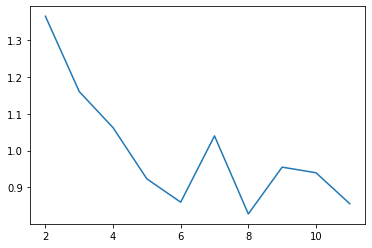

In [ ]:
lossvshiddenlayer={}
for x in range(2,12):
  model = Autoencoder_Linear(x)
  # print(model)
  optimizer = optim.Adam(model.parameters(), lr=0.001)
  criterion = nn.MSELoss()
  epochs = 5
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
      batch_features = batch_features.view(-1, 784)
      optimizer.zero_grad()
      outputs = model(batch_features)
      train_loss = criterion(outputs, batch_features)
      train_loss.backward()
      optimizer.step()
      loss += train_loss.item()
    loss = loss / len(train_loader)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
  total_loss=0
  with torch.no_grad():
    for data in test_loader:
      images, _ = data
      images = images.view(-1, 784)
      outputs = model(images)
      test_loss = criterion(outputs, images)
      total_loss += test_loss.item()
    total_loss = total_loss / len(test_loader)
    print("Test Reconstruction Loss={:.6f}".format(total_loss))
  lossvshiddenlayer[x]=total_loss
plt.plot(*zip(*lossvshiddenlayer.items()))
plt.show()

# SGD Optimmizer

epoch : 1/5, loss = 0.223305
epoch : 2/5, loss = 0.109564
epoch : 3/5, loss = 0.068196
epoch : 4/5, loss = 0.067522
epoch : 5/5, loss = 0.067194
Test Reconstruction Loss=0.067238
epoch : 1/5, loss = 0.224234
epoch : 2/5, loss = 0.135197
epoch : 3/5, loss = 0.068434
epoch : 4/5, loss = 0.067607
epoch : 5/5, loss = 0.067296
Test Reconstruction Loss=0.067358
epoch : 1/5, loss = 0.224036
epoch : 2/5, loss = 0.129292
epoch : 3/5, loss = 0.068285
epoch : 4/5, loss = 0.067460
epoch : 5/5, loss = 0.067013
Test Reconstruction Loss=0.067014
epoch : 1/5, loss = 0.224848
epoch : 2/5, loss = 0.152245
epoch : 3/5, loss = 0.068919
epoch : 4/5, loss = 0.067392
epoch : 5/5, loss = 0.066625
Test Reconstruction Loss=0.066496
epoch : 1/5, loss = 0.226851
epoch : 2/5, loss = 0.199453
epoch : 3/5, loss = 0.082580
epoch : 4/5, loss = 0.068042
epoch : 5/5, loss = 0.067556
Test Reconstruction Loss=0.067695
epoch : 1/5, loss = 0.225928
epoch : 2/5, loss = 0.187651
epoch : 3/5, loss = 0.074238
epoch : 4/5, loss 

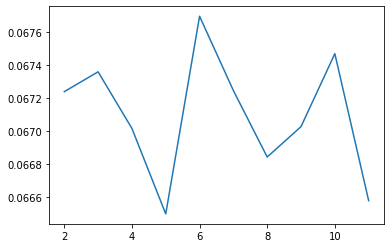

In [ ]:
lossvshiddenlayer={}
for x in range(2,12):
  model = Autoencoder_Linear(x)
  optimizer = optim.SGD(model.parameters(), lr=0.1)
  criterion = nn.MSELoss()
  epochs = 5
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
      batch_features = batch_features.view(-1, 784)
      optimizer.zero_grad()
      outputs = model(batch_features)
      train_loss = criterion(outputs, batch_features)
      train_loss.backward()
      optimizer.step()
      loss += train_loss.item()
    loss = loss / len(train_loader)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
  total_loss=0
  with torch.no_grad():
    for data in test_loader:
      images, _ = data
      images = images.view(-1, 784)
      outputs = model(images)
      test_loss = criterion(outputs, images)
      total_loss += test_loss.item()
    total_loss = total_loss / len(test_loader)
    print("Test Reconstruction Loss={:.6f}".format(total_loss))
  lossvshiddenlayer[x]=total_loss
plt.plot(*zip(*lossvshiddenlayer.items()))
plt.show()

# SGD with Momentum

epoch : 1/5, loss = 0.217706
epoch : 2/5, loss = 0.095415
epoch : 3/5, loss = 0.068003
epoch : 4/5, loss = 0.067430
epoch : 5/5, loss = 0.067027
Test Reconstruction Loss=0.067035
epoch : 1/5, loss = 0.226705
epoch : 2/5, loss = 0.149499
epoch : 3/5, loss = 0.068895
epoch : 4/5, loss = 0.067508
epoch : 5/5, loss = 0.066565
Test Reconstruction Loss=0.066386
epoch : 1/5, loss = 0.226630
epoch : 2/5, loss = 0.195518
epoch : 3/5, loss = 0.076006
epoch : 4/5, loss = 0.067956
epoch : 5/5, loss = 0.067027
Test Reconstruction Loss=0.066864
epoch : 1/5, loss = 0.225837
epoch : 2/5, loss = 0.175385
epoch : 3/5, loss = 0.071135
epoch : 4/5, loss = 0.067834
epoch : 5/5, loss = 0.067501
Test Reconstruction Loss=0.067608
epoch : 1/5, loss = 0.223226
epoch : 2/5, loss = 0.112769
epoch : 3/5, loss = 0.068280
epoch : 4/5, loss = 0.067607
epoch : 5/5, loss = 0.067357
Test Reconstruction Loss=0.067488
epoch : 1/5, loss = 0.224948
epoch : 2/5, loss = 0.145374
epoch : 3/5, loss = 0.068946
epoch : 4/5, loss 

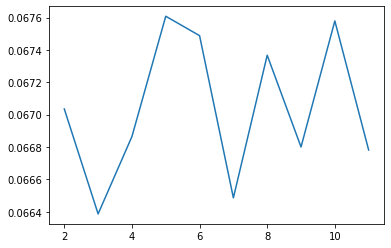

In [ ]:
lossvshiddenlayer={}
for x in range(2,12):
  model = Autoencoder_Linear(x)
  # print(model)
  optimizer = optim.SGD(model.parameters(), lr=0.01 , momentum=0.9)
  criterion = nn.MSELoss()
  epochs = 5
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
      batch_features = batch_features.view(-1, 784)
      optimizer.zero_grad()
      outputs = model(batch_features)
      train_loss = criterion(outputs, batch_features)
      train_loss.backward()
      optimizer.step()
      loss += train_loss.item()
    loss = loss / len(train_loader)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
  total_loss=0
  with torch.no_grad():
    for data in test_loader:
      images, _ = data
      images = images.view(-1, 784)
      outputs = model(images)
      test_loss = criterion(outputs, images)
      total_loss += test_loss.item()
    total_loss = total_loss / len(test_loader)
    print("Test Reconstruction Loss={:.6f}".format(total_loss))
  lossvshiddenlayer[x]=total_loss
plt.plot(*zip(*lossvshiddenlayer.items()))
plt.show()

# RMSprop Optimizer

epoch : 1/5, loss = 0.055878
epoch : 2/5, loss = 0.046000
epoch : 3/5, loss = 0.043412
epoch : 4/5, loss = 0.041770
epoch : 5/5, loss = 0.040810
Test Reconstruction Loss=0.040486
epoch : 1/5, loss = 0.055077
epoch : 2/5, loss = 0.041119
epoch : 3/5, loss = 0.038131
epoch : 4/5, loss = 0.036565
epoch : 5/5, loss = 0.035628
Test Reconstruction Loss=0.035595
epoch : 1/5, loss = 0.054161
epoch : 2/5, loss = 0.041426
epoch : 3/5, loss = 0.037378
epoch : 4/5, loss = 0.035011
epoch : 5/5, loss = 0.033275
Test Reconstruction Loss=0.032602
epoch : 1/5, loss = 0.053731
epoch : 2/5, loss = 0.041784
epoch : 3/5, loss = 0.035894
epoch : 4/5, loss = 0.032202
epoch : 5/5, loss = 0.030241
Test Reconstruction Loss=0.029780
epoch : 1/5, loss = 0.055624
epoch : 2/5, loss = 0.041572
epoch : 3/5, loss = 0.035567
epoch : 4/5, loss = 0.031880
epoch : 5/5, loss = 0.029402
Test Reconstruction Loss=0.028004
epoch : 1/5, loss = 0.052477
epoch : 2/5, loss = 0.036955
epoch : 3/5, loss = 0.032345
epoch : 4/5, loss 

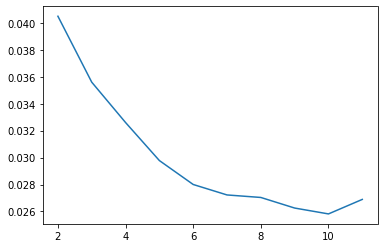

In [ ]:
lossvshiddenlayer={}
for x in range(2,12):
  model = Autoencoder_Linear(x)
  # print(model)
  optimizer = optim.RMSprop(model.parameters(), lr=0.001)
  criterion = nn.MSELoss()
  epochs = 5
  for epoch in range(epochs):
    loss = 0
    for batch_features, _ in train_loader:
      batch_features = batch_features.view(-1, 784)
      optimizer.zero_grad()
      outputs = model(batch_features)
      train_loss = criterion(outputs, batch_features)
      train_loss.backward()
      optimizer.step()
      loss += train_loss.item()
    loss = loss / len(train_loader)
    print("epoch : {}/{}, loss = {:.6f}".format(epoch + 1, epochs, loss))
  total_loss=0
  with torch.no_grad():
    for data in test_loader:
      images, _ = data
      images = images.view(-1, 784)
      outputs = model(images)
      test_loss = criterion(outputs, images)
      total_loss += test_loss.item()
    total_loss = total_loss / len(test_loader)
    print("Test Reconstruction Loss={:.6f}".format(total_loss))
  lossvshiddenlayer[x]=total_loss
plt.plot(*zip(*lossvshiddenlayer.items()))
plt.show()

In [ ]:
import matplotlib.pyplot as plt

for k in output:
    plt.figure(figsize=(9, 2))
    plt.gray()
    imgs = k[1].detach().numpy()
    recon = k[2].detach().numpy()
    for i, item in enumerate(imgs):
        if i >= 9: break
        plt.subplot(2, 9, i+1)
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])
            
    for i, item in enumerate(recon):
        if i >= 9: break
        plt.subplot(2, 9, 9+i+1) # row_length + i + 1
        item = item.reshape(-1, 28,28) # -> use for Autoencoder_Linear
        # item: 1, 28, 28
        plt.imshow(item[0])

#PCA Recontruction

In [ ]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import numpy as np
images_test = [test_dataset[x][0].numpy() for x in range(len(test_dataset))]
images_test = np.array(images_test)
images_test = images_test.reshape(images_test.shape[0],-1)
images_test.shape

(10000, 784)

In [ ]:
pca = PCA(n_components=10)
pca_test = pca.fit_transform(images_test)

In [ ]:
pca.explained_variance_ratio_

array([0.10047685, 0.0754452 , 0.06140547, 0.05425833, 0.05031271,
       0.04246375, 0.03311414, 0.02950301, 0.02729869, 0.02278052,
       0.02133869, 0.0209521 , 0.01725903, 0.01685716, 0.01576046,
       0.01494418], dtype=float32)

In [ ]:
reconstructed = pca.inverse_transform(pca_test)
mean_squared_error(reconstructed,images_test)

0.033902615